In [188]:
#dependencies and 
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import eia_api

In [189]:
base_url = "https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[seriesId][]=ESTPP&facets[seriesId][]=PATPP&facets[seriesId][]=TETPB&facets[seriesId][]=GDPRV&facets[seriesId][]=NCPRB&facets[seriesId][]=REPRB&facets[seriesId][]=RETCB&facets[seriesId][]=TERPB&facets[seriesId][]=ESRPP&start=2014&end=2018&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
url = base_url + "&api_key=" + eia_api

In [190]:
response = requests.get(url).json()
# print(json.dumps(response["response"]["data"], indent=4, sort_keys=True))
data = response["response"]["data"]

df =pd.DataFrame(data)
# df

In [191]:
df.sort_values(['stateId', 'period'])

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
1350,2015,REPRB,Renewable energy production,AK,Alaska,23798.0,Billion Btu
1439,2015,ESTPP,Electricity total consumption (electricity sal...,AK,Alaska,8341.0,Kilowatthours
1462,2015,ESRPP,"Electricity consumed by (i.e., sold to) the re...",AK,Alaska,2768.0,Kilowatthours
1496,2015,PATPP,All petroleum products total consumption per c...,AK,Alaska,56.8,Barrels
1577,2015,RETCB,Renewable energy total consumption,AK,Alaska,23819.0,Billion Btu
...,...,...,...,...,...,...,...
248,2018,PATPP,All petroleum products total consumption per c...,WY,Wyoming,51.0,Barrels
293,2018,TERPB,Total energy consumption per capita in the res...,WY,Wyoming,88.9,Million Btu
318,2018,ESRPP,"Electricity consumed by (i.e., sold to) the re...",WY,Wyoming,4746.0,Kilowatthours
409,2018,GDPRV,Current-dollar gross domestic product (GDP),WY,Wyoming,39171.7,Million dollars


In [192]:
list(df['seriesDescription'].explode().unique())

['Electricity total consumption (electricity sales to ultimate customers) per capita',
 'Noncombustible renewable energy production',
 'Renewable energy production',
 'Total energy consumption per capita in the residential sector',
 'All petroleum products total consumption per capita',
 'Electricity consumed by (i.e., sold to) the residential sector per capita',
 'Total energy consumption per capita',
 'Current-dollar gross domestic product (GDP)',
 'Renewable energy total consumption']

In [193]:
list(df['seriesId'].explode().unique())

['ESTPP',
 'NCPRB',
 'REPRB',
 'TERPB',
 'PATPP',
 'ESRPP',
 'TETPB',
 'GDPRV',
 'RETCB']

In [194]:
df.loc[(df.seriesId == 2015), 'seriesId'] = '2015' 
df.loc[(df.seriesId == 2016), 'seriesId'] = '2016' 
df.loc[(df.seriesId == 2017), 'seriesId'] = '2017' 
df.loc[(df.seriesId == 2018), 'seriesId'] = '2018' 

In [195]:
df['seriesId'] = df.seriesId.astype('category')

In [197]:
ESTPP_df = df.loc[df["seriesId"]=="ESTPP"]
ESTPP_df

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,2018,ESTPP,Electricity total consumption (electricity sal...,IN,Indiana,15555.0,Kilowatthours
103,2018,ESTPP,Electricity total consumption (electricity sal...,HI,Hawaii,6561.0,Kilowatthours
115,2018,ESTPP,Electricity total consumption (electricity sal...,CA,California,6472.0,Kilowatthours
126,2018,ESTPP,Electricity total consumption (electricity sal...,SD,South Dakota,14620.0,Kilowatthours
138,2018,ESTPP,Electricity total consumption (electricity sal...,AZ,Arizona,10936.0,Kilowatthours
...,...,...,...,...,...,...,...
1490,2015,ESTPP,Electricity total consumption (electricity sal...,OK,Oklahoma,15685.0,Kilowatthours
1491,2015,ESTPP,Electricity total consumption (electricity sal...,OR,Oregon,11761.0,Kilowatthours
1494,2015,ESTPP,Electricity total consumption (electricity sal...,NJ,New Jersey,8510.0,Kilowatthours
1500,2015,ESTPP,Electricity total consumption (electricity sal...,LA,Louisiana,19644.0,Kilowatthours


In [198]:
ESTPP_df.groupby(["stateId", "period"]).sum("value")

value
stateId period         
AK      2015     8341.0
        2016     8246.0
        2017     8348.0
        2018     8108.0
AL      2015    18301.0
...                 ...
WV      2018    18631.0
WY      2015    28863.0
        2016    28287.0
        2017    28928.0
        2018    29125.0

[200 rows x 1 columns]

<Axes: xlabel='stateId,period'>

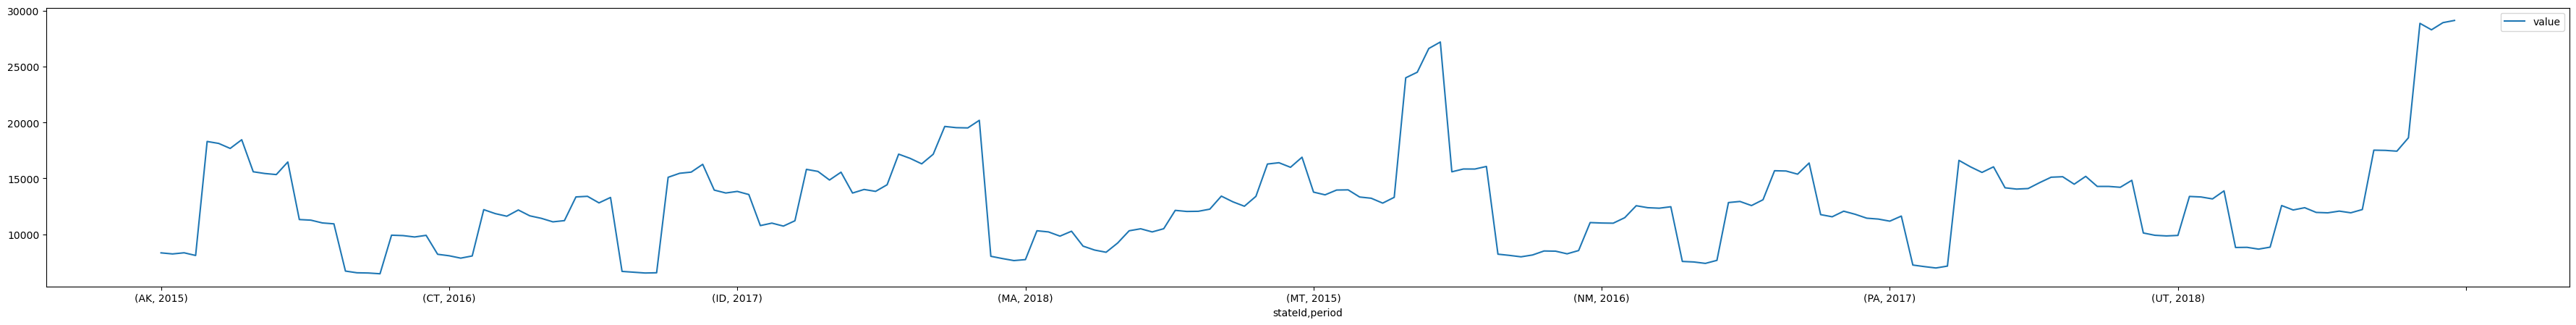

In [206]:
ESTPP_df.groupby(["stateId", "period"]).sum("value").plot(figsize=(45,5))

In [ ]:
base_url2 = "https://api.eia.gov/v2/co2-emissions/co2-emissions-and-carbon-coefficients/data/?frequency=annual&data[0]=emissions&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[sectorId][]=1&start=2015&end=2018&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
url2 = base_url2 + "&api_key=" + eia_api

In [130]:
response2 = requests.get(url2).json()
# print(json.dumps(response["response"]["data"], indent=4, sort_keys=True))
data2 = response2["response"]["data"]

df2 =pd.DataFrame(data2)

In [131]:
df2.sort_values(['stateId', 'period'])

,period,seriesId,series-name,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,emissions,emissions-units
767,2015,NGEIB,Electric Power carbon dioxide emissions Natura...,1,Electric Power Consumption,6,natural gas (pipeline),AK,Alaska,1.603903e+06,CO2 metric tons
818,2015,PCEIB,Electric Power carbon dioxide emissions Petrol...,1,Electric Power Consumption,18,petroleum coke,AK,Alaska,0.000000e+00,CO2 metric tons
820,2015,RFEIB,Electric Power carbon dioxide emissions Residu...,1,Electric Power Consumption,19,residual fuel,AK,Alaska,5.760036e+04,CO2 metric tons
944,2015,CLEIB,Electric Power carbon dioxide emissions Coal (...,1,Electric Power Consumption,5,coal (electric utility),AK,Alaska,1.051574e+06,CO2 metric tons
992,2015,DKEIB,Electric Power carbon dioxide emissions Distil...,1,Electric Power Consumption,11,distillate fuel,AK,Alaska,2.448330e+05,CO2 metric tons
...,...,...,...,...,...,...,...,...,...,...,...
74,2018,DKEIB,Electric Power carbon dioxide emissions Distil...,1,Electric Power Consumption,11,distillate fuel,WY,Wyoming,2.713865e+04,CO2 metric tons
123,2018,RFEIB,Electric Power carbon dioxide emissions Residu...,1,Electric Power Consumption,19,residual fuel,WY,Wyoming,0.000000e+00,CO2 metric tons
143,2018,NGEIB,Electric Power carbon dioxide emissions Natura...,1,Electric Power Consumption,6,natural gas (pipeline),WY,Wyoming,1.043625e+05,CO2 metric tons
215,2018,PCEIB,Electric Power carbon dioxide emissions Petrol...,1,Electric Power Consumption,18,petroleum coke,WY,Wyoming,0.000000e+00,CO2 metric tons


In [202]:
df2.groupby(["stateId", "period"]).sum("emissions")

sectorId  fuelId     emissions
stateId period                                
AK      2015           5      59  2.957910e+06
        2016           5      59  2.758868e+06
        2017           5      59  2.789060e+06
        2018           5      59  2.692371e+06
AL      2015           5      59  6.239181e+07
...                  ...     ...           ...
WV      2018           5      59  6.123735e+07
WY      2015           5      59  4.381507e+07
        2016           5      59  4.071969e+07
        2017           5      59  4.086288e+07
        2018           5      59  4.065412e+07

[200 rows x 3 columns]

In [203]:
df2.plot(figsize=30,5)

SyntaxError: positional argument follows keyword argument (96901377.py, line 1)